# predicting air temperature using linaer regression model
## Ibrahim Shedoh
## 22/09/2024

In [152]:
# importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Loading the data set

In [153]:
# loading data
df=pd.read_csv('weather_data.csv')

In [154]:
# head of dataset
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog



# 2) Understanding the dateset

In [155]:
# tail of the dataset
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [156]:
# stracture of the dataframe
df.shape

(8784, 8)

In [157]:
# data types of each column
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [158]:
# Rename the column
df.rename(columns={'Dew Point Temp_C': 'Dew_Point_Temp_C'}, inplace=True)

In [159]:
# column names 
df.columns

Index(['Date/Time', 'Temp_C', 'Dew_Point_Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [160]:
#describe the numeric columns of the dataset 
df.describe()

,Temp_C,Dew_Point_Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [161]:
# more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew_Point_Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [162]:
# checking missing value
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew_Point_Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

## Data Visualization 

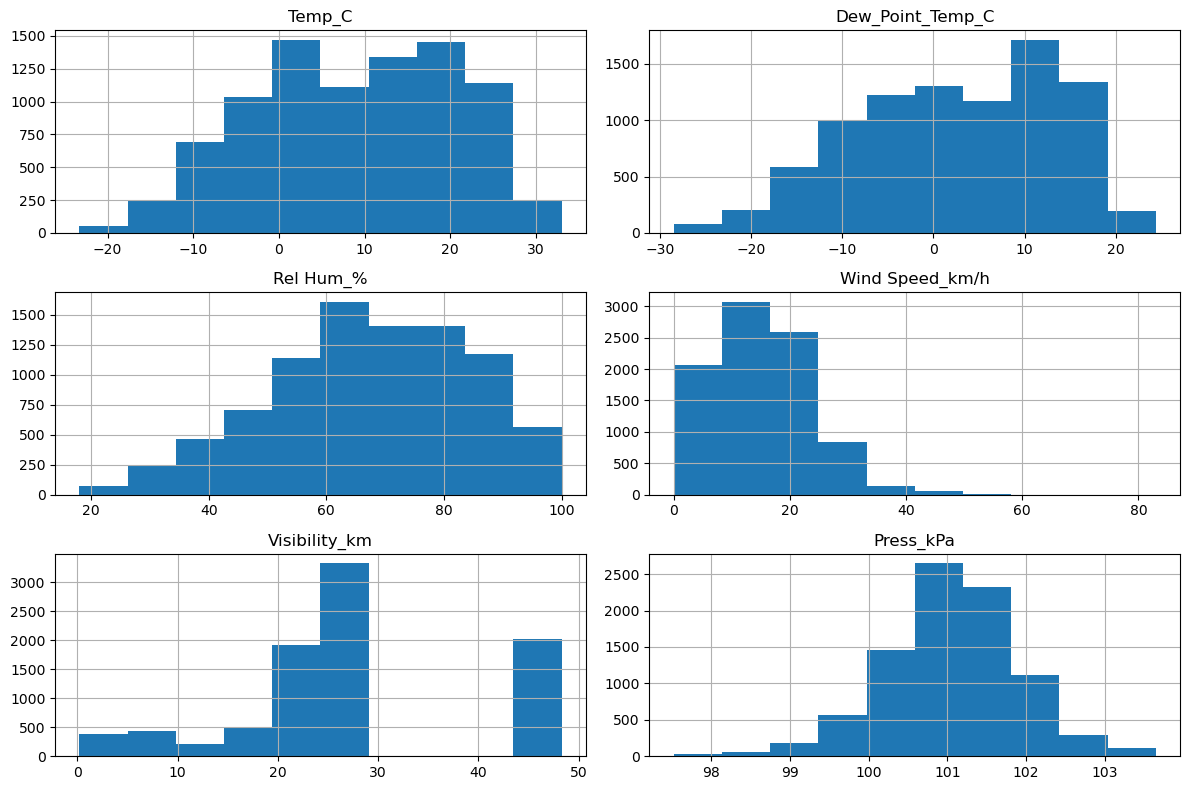

In [163]:
# Histogram for all numerical variables
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

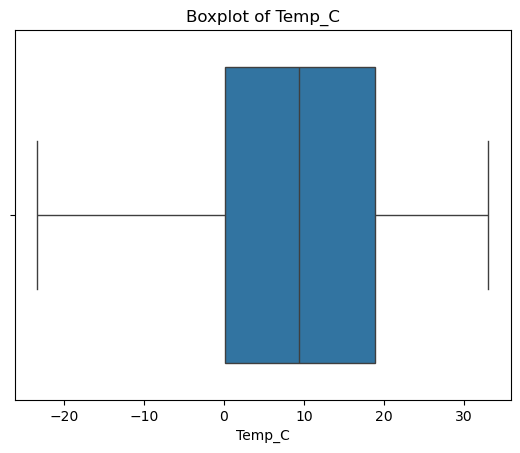

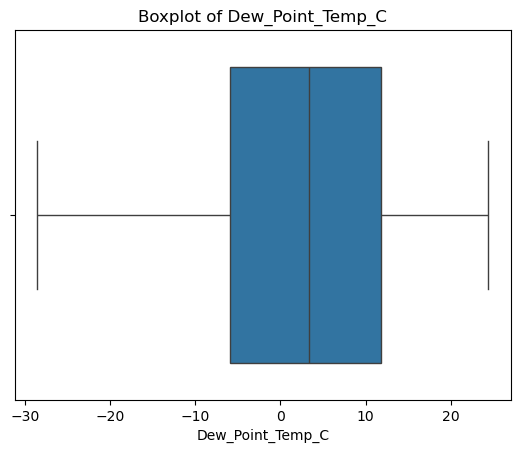

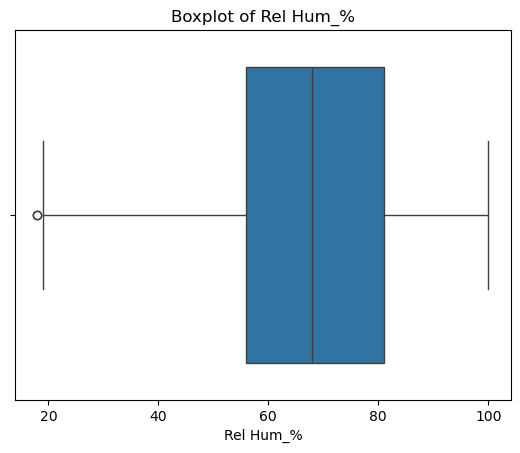

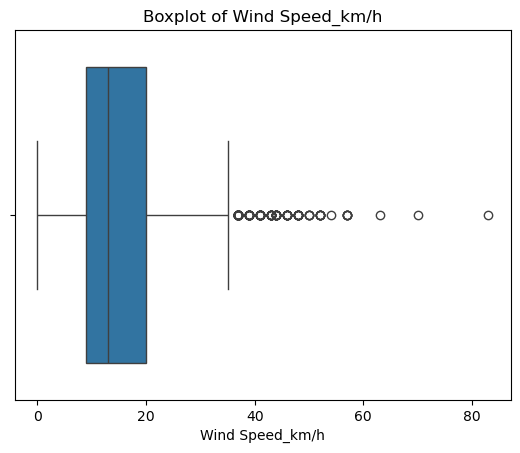

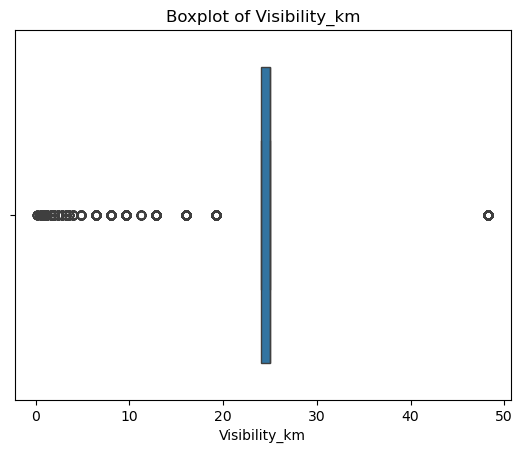

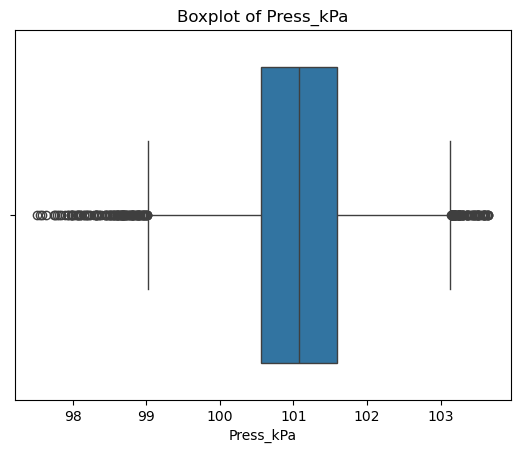

In [164]:
# Boxplots for numerical variables
for col in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# 3) Linear regression Model

In [165]:
# selecting feature and target value
y=df[['Temp_C']] # target variable
X=df[['Dew_Point_Temp_C']]  # feature

In [166]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# create the model
model = LinearRegression()

In [168]:
# train the model 
model.fit(X_train, y_train)

LinearRegression()

In [169]:
# make prediction  
y_pred = model.predict(X_test)

In [170]:
# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (m) : {slope}")
print(f"Intercept (b) : {intercept}")

Slope (m) : [1.00153389]
Intercept (b) : [6.20679643]


In [171]:
# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 18.631759483670084
R^2 Score: 0.8713486707520448


In [172]:
import pandas as pd

# Get input from the user
# Convert to float for consistency
Dew_Point_Temp_C = float(input("Enter the Dew Point Temp_C: "))

# Create a dictionary with input values
input_data = {
    'Dew_Point_Temp_C': [Dew_Point_Temp_C]
}

# Convert the dictionary to a DataFrame and then access the values
input_df = pd.DataFrame.from_dict(input_data)

# Predict using the model
y = 6.20679643 + (1.00153389 *Dew_Point_Temp_C)
print("The air temperature is: ", y)


Enter the Dew Point Temp_C:  4


The air temperature is:  10.21293199
